## Bayes' Theorem Example: Monty Hall Problem <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 


### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had N doors to choose from and the presenter opens N-2 of them?

In [ ]:
import numpy as np

def simulation(doors, player, verbose=False):
    if player.lower() not in ['switcher', 'conservative', 'newcomer']:
        raise "Player is not of type 'switcher', 'conservative' or 'newcomer'."
    
    if player.lower() in ['switcher', 'conservative']:
        first_choice = np.random.randint(1, 4)
    else: 
        first_choice = None
    
    # Commentator removes one goat door
    
    removed = [k for k, v in doors.items() if v == 0 and k != first_choice][0]
    new_doors = {k:v for k, v in doors.items() if k != removed }
    
    if player == 'switcher':
        final_choice = [k for k, v in new_doors.items() if k != first_choice][0]
        
    elif player == 'conservative':
        final_choice = first_choice
        
    else:
        final_choice = np.random.choice(list(new_doors.keys()))
        
    if verbose:
        print(f"Doors: {doors}")
        print(f"Player type: {player}")
        print(f"First choice: {first_choice}")
        print(f"Door removed: {removed}")
        print(f"Final choice: {final_choice}")
        
    if doors[final_choice] == 1:
        return 1
    return 0


doors_value = np.array([0, 0, 1])

np.random.shuffle(doors_value)

doors = {k:v for (k, v) in zip((1, 2, 3), doors_value)}


_ = simulation(doors, 'newcomer', verbose=True)
    
    

Doors: {1: np.int64(1), 2: np.int64(0), 3: np.int64(0)}
Player type: newcomer
First choice: None
Door removed: 2
Final choice: 3


In [ ]:
# It works, now do many iterations

def test_sim(n_iter=10000):
    print(f"Success rate for 3 doors, 1 prize, 1 open")
    switcher_results = []
    conservative_results = []
    newcomer_results = []
    doors_value = np.array([0, 0, 1])
    
    for _ in range(n_iter):
        np.random.shuffle(doors_value)
        doors = {k:v for (k, v) in zip((1, 2, 3), doors_value)}
        switcher_results.append(simulation(doors, 'switcher'))
        conservative_results.append(simulation(doors, 'conservative'))
        newcomer_results.append(simulation(doors, 'newcomer'))
        
    print(f"Average switcher success: {np.mean(switcher_results)}")
    print(f"Average conservative success: {np.mean(conservative_results)}")
    print(f"Average newcomer success: {np.mean(newcomer_results)}")
    return switcher_results, conservative_results, newcomer_results
    
    
_ = test_sim()
        

Success rate for 3 doors, 1 prize, 1 open
Average switcher success: 0.6611
Average conservative success: 0.3327
Average newcomer success: 0.4955


In [ ]:
def simulation_multiple(n_doors, n_wins, n_open, player, verbose=False):
    if n_doors < n_wins + n_open + 1:
        raise "Assumption commentator always open goat not meet."
    
    doors_value = np.zeros(n_doors)
    win_indexes = np.random.choice(range(n_doors), size=n_wins, replace=True)
    doors_value[win_indexes] = 1
    doors = {k:v for (k, v) in zip(range(1, n_doors+1), doors_value)}
    
    if player.lower() not in ['switcher', 'conservative', 'newcomer']:
        raise "Player is not of type 'switcher', 'conservative' or 'newcomer'."
    
    if player.lower() in ['switcher', 'conservative']:
        first_choice = np.random.randint(1, n_doors+1)
    else: 
        first_choice = None
    
    # Commentator removes n goat door
    
    removed = np.random.choice([k for k, v in doors.items() if v == 0 and k != first_choice], size=n_open, replace=True)
    new_doors = {k:v for k, v in doors.items() if k not in removed }
    
    if player == 'switcher':
        final_choice = np.random.choice([k for k, v in new_doors.items() if k != first_choice])
        
    elif player == 'conservative':
        final_choice = first_choice
        
    else:
        final_choice = np.random.choice(list(new_doors.keys()))
        
    if verbose:
        print(f"Doors: {doors}")
        print(f"Player type: {player}")
        print(f"First choice: {first_choice}")
        print(f"Door removed: {removed}")
        print(f"Final choice: {final_choice}")
        
    if doors[final_choice] == 1:
        return 1
    return 0
    
    
_ = simulation_multiple(10, 2, 4, "switcher", True)


Doors: {1: np.float64(0.0), 2: np.float64(1.0), 3: np.float64(0.0), 4: np.float64(0.0), 5: np.float64(0.0), 6: np.float64(0.0), 7: np.float64(0.0), 8: np.float64(1.0), 9: np.float64(0.0), 10: np.float64(0.0)}
Player type: switcher
First choice: 2
Door removed: [ 5  9 10  4]
Final choice: 8


In [ ]:
def test_sim_multiple(n_iter=10000, n_doors=10, n_wins=2, n_open=5):
    print(f"Success rate for {n_doors} doors, {n_wins} prizes, {n_open} open")
    switcher_results = []
    conservative_results = []
    newcomer_results = []
    
    for _ in range(n_iter):
        switcher_results.append(simulation_multiple(n_doors, n_wins, n_open, 'switcher'))
        conservative_results.append(simulation_multiple(n_doors, n_wins, n_open, 'conservative'))
        newcomer_results.append(simulation_multiple(n_doors, n_wins, n_open, 'newcomer'))
        
    print(f"Average switcher success: {np.mean(switcher_results)}")
    print(f"Average conservative success: {np.mean(conservative_results)}")
    print(f"Average newcomer success: {np.mean(newcomer_results)}")
    return switcher_results, conservative_results, newcomer_results
    
_ = test_sim_multiple()

Success rate for 10 doors, 2 prizes, 5 open
Average switcher success: 0.3379
Average conservative success: 0.195
Average newcomer success: 0.3152


Success rate for 3 doors, 1 prize, 1 open
Average switcher success: 0.6678
Average conservative success: 0.3302
Average newcomer success: 0.5002
Success rate for 10 doors, 2 prizes, 5 open
Average switcher success: 0.3422
Average conservative success: 0.199
Average newcomer success: 0.3129


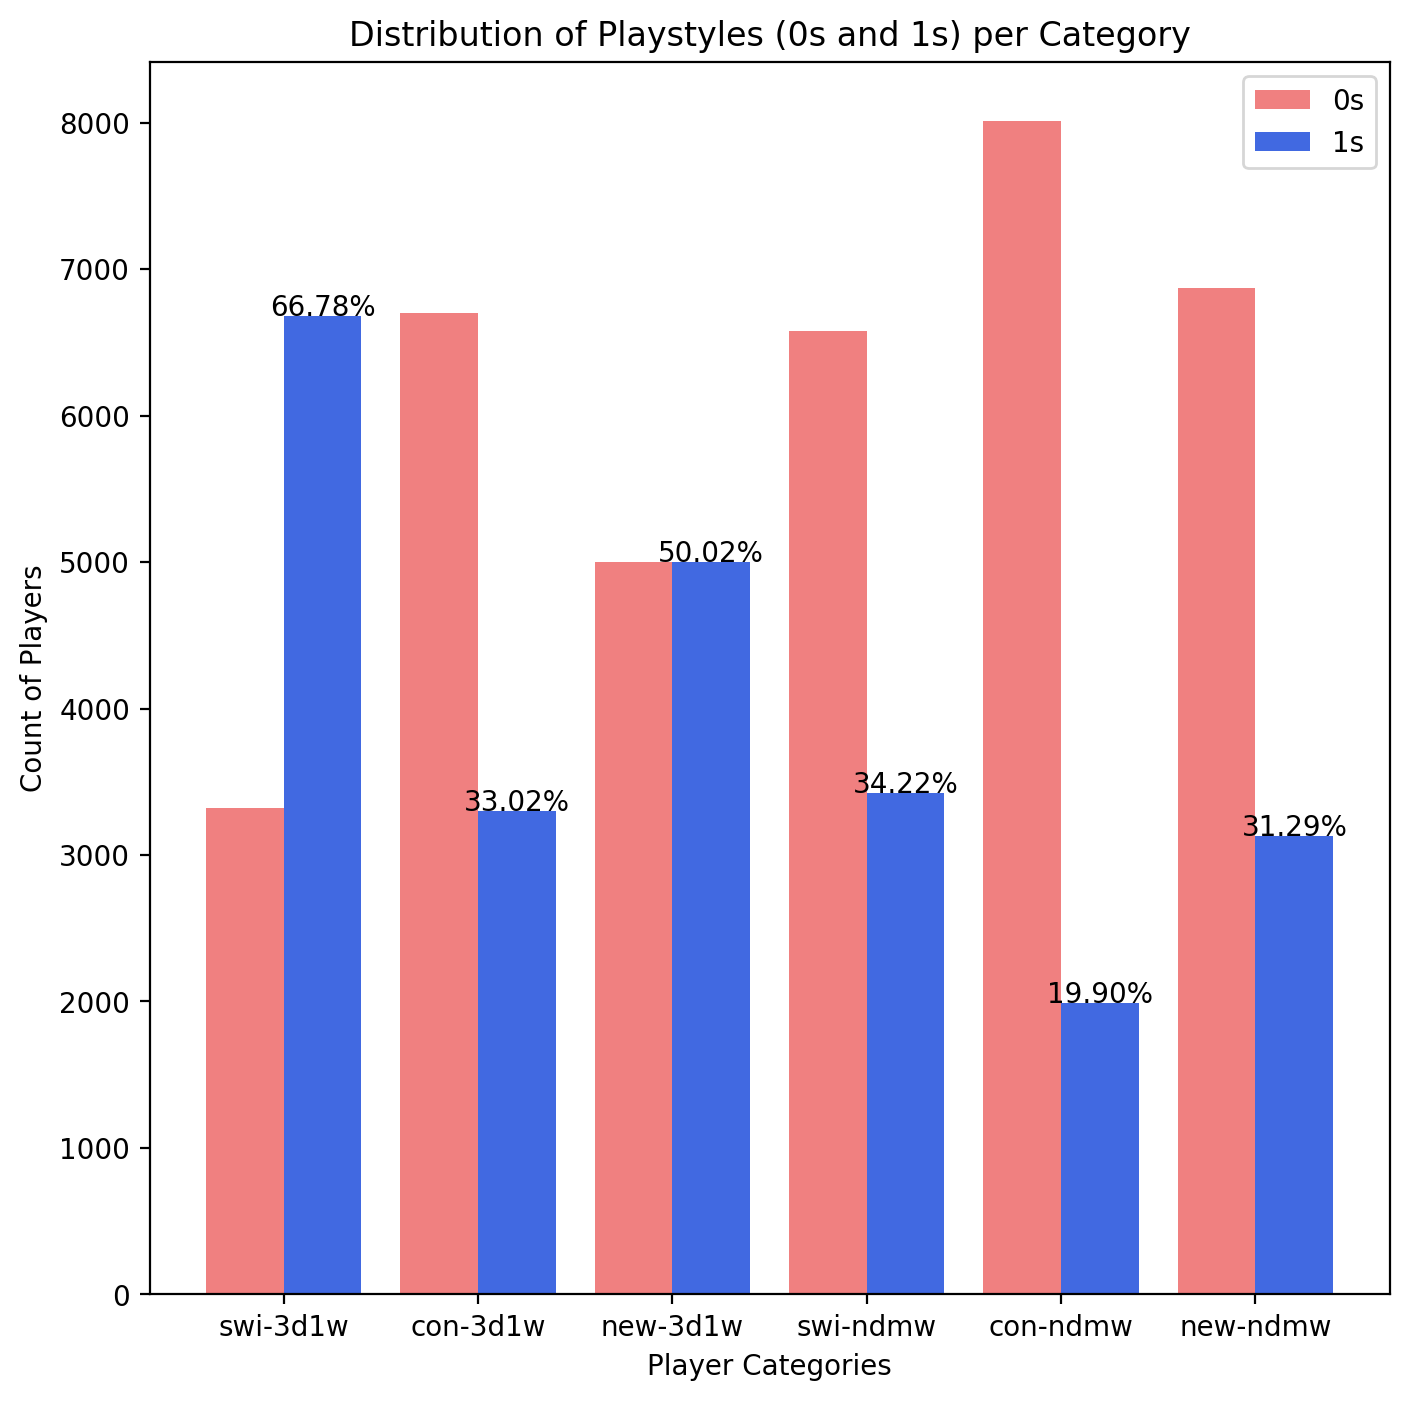

In [ ]:
import matplotlib.pyplot as plt

def graph_visualization():
    categories = ['swi-3d1w', 'con-3d1w', 'new-3d1w', 'swi-ndmw', 'con-ndmw', 'new-ndmw']
    s1, c1, n1 = test_sim()
    s2, c2, n2 = test_sim_multiple()
    data = {k:v for (k, v) in zip(categories, [s1, c1, n1, s2, c2, n2])}

    counts = {cat: [np.sum(np.array(data[cat]) == 0), np.sum(np.array(data[cat]) == 1)] for cat in categories}
    
    x = np.arange(len(categories))  # X-axis positions
    width = 0.4  # Bar width
    
    fig, ax = plt.subplots()
    bars_0 = ax.bar(x - width/2, [counts[cat][0] for cat in categories], width, label="0s", color="lightcoral")
    bars_1 = ax.bar(x + width/2, [counts[cat][1] for cat in categories], width, label="1s", color="royalblue")
    
    ax.set_xlabel("Player Categories")
    ax.set_ylabel("Count of Players")
    ax.set_title("Distribution of Playstyles (0s and 1s) per Category")
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    
    for i, cat in enumerate(categories):
        ax.text(x[i] + width/2, counts[cat][1] + 0.5, "{:.2f}".format(np.mean(data[cat])*100) + "%", ha='center', fontsize=10, color="black")
    
    plt.show()
    
    
graph_visualization()